In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_parquet('../data/data.parquet')

features = data[["x", "y"]]
targets = data[["f1", "f2"]]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

# Créer le modèle PMC
model = Sequential([
    Dense(32, input_dim=2, activation='sigmoid'),  # Couche cachée de 32 neurones
    Dense(32, activation='sigmoid'),  # Couche cachée de 32 neurones
    Dense(2)  # Couche de sortie avec 2 neurones (pour f1 et f2)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=8)

In [13]:
# Évaluer le modèle
loss, mae = model.evaluate(X_test, y_test)
y_test_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'Loss: {loss}, MAE: {mae}, MAPE: {mape}')




13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mae: 0.0659
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Loss: 0.008396115154027939, MAE: 0.06722036004066467, MAPE: 0.08936714849698064


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


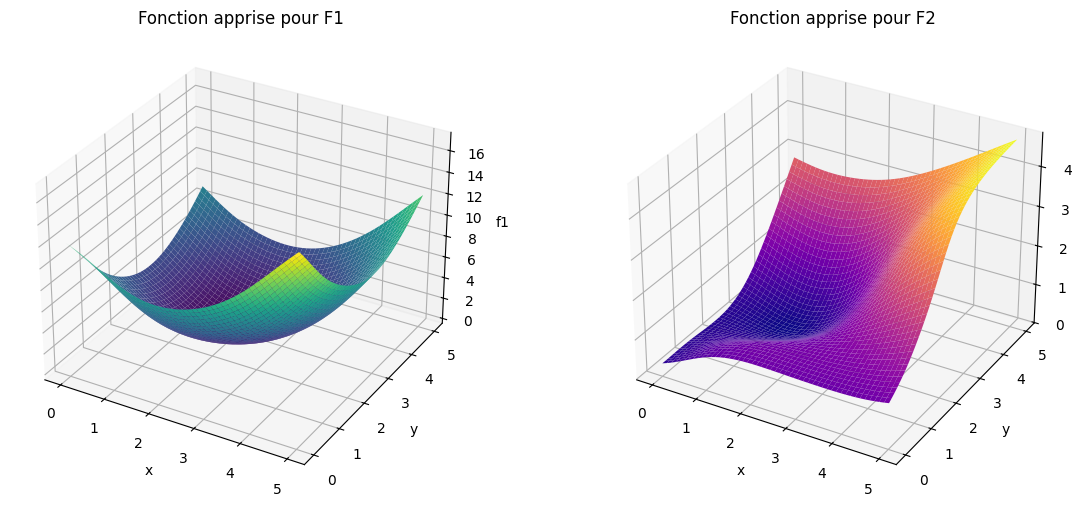

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Générer une grille de valeurs pour x et y
x_values = np.linspace(features['x'].min(), features['x'].max(), 50)
y_values = np.linspace(features['y'].min(), features['y'].max(), 50)
X_grid, Y_grid = np.meshgrid(x_values, y_values)
grid_data = np.c_[X_grid.ravel(), Y_grid.ravel()]

# Prédire les valeurs de f1 et f2 pour la grille
predictions = model.predict(grid_data)
grid_data = grid_data
F1_grid = predictions[:, 0].reshape(X_grid.shape)
F2_grid = predictions[:, 1].reshape(X_grid.shape)

# Créer une figure avec deux sous-graphes pour les fonctions f1 et f2
fig = plt.figure(figsize=(14, 6))

# Plot 3D pour f1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_grid, Y_grid, F1_grid, cmap='viridis')
ax1.set_title('Fonction apprise pour F1')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f1')

# Plot 3D pour f2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_grid, Y_grid, F2_grid, cmap='plasma')
ax2.set_title('Fonction apprise pour F2')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f2')

# Afficher les plots
plt.show()
